<div style="margin: 0 auto 30px; height: 60px; border: 2px solid gray; border-radius: 6px;">
  <div style="float: left;"><img src="img/epfl.png" /></div>
  <div style="float: right; margin: 20px 30px 0; font-size: 10pt; font-weight: bold;"><a href="https://moodle.epfl.ch/course/view.php?id=18253">COM202 - Signal Processing</a></div>
</div>
<div style="clear: both; font-size: 30pt; font-weight: bold; color: #483D8B;">
    Lab 2: Introduction to Numpy
</div>

In [1]:
## First things first, import numpy (as almost always)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Numpy is a solid library that provides lots of built in functions specifically designed for vector and matrix operations. While this seems a bit useless for you now (after having to compute all these matrices by hand without knowing why), it will quickly become mandatory for lots of applications throughout your studies. 

That is why we are going through this lab to explore some simple linear algebra opperations on numpy and see a specific application with the Haar Basis (that is used for image processing). 

# Numpy Arrays

There are two standard ways of creating numpy arrays. Either transform a usual array object using ``np.array`` or by using the built-in function of numpy.

In [2]:
## Building arrays with numpy function:
## Here we create an array from a numpy array.
vect = np.array(np.ones(5))

matr = np.array([[1,2,3],[4,5,6]])

## There exists various built-in functions to easily create different array-like objects:
id_matrix = np.eye(5)

one_matrix = np.ones((5,3))

zero_matrices = np.zeros((2,3,3))


print("1D vector: \n{}\n".format(vect))
print("2D matrix: \n{}\n".format(matr))
print("Identity matrix: \n{}\n".format(id_matrix))
print("1 matrix: \n{}\n".format(one_matrix))
print("array of 0 matrix: \n{}\n".format(zero_matrices))

1D vector: 
[1. 1. 1. 1. 1.]

2D matrix: 
[[1 2 3]
 [4 5 6]]

Identity matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

1 matrix: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

array of 0 matrix: 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]



## Data types

Eventhough python is not a static typed language, since pyton3, one can specify the type of a variable by instantiating it like variable:type=value. In any case, there is possibilities to specify data types in array. Data types can also be cast using ``astype``. This is particularly useful when you want arrays with specific data types.

In [3]:
## Creating an array of integers
int_vect = np.array([1,2,3,4,5], dtype=np.int32)
print(int_vect.dtype)

## Cast int array to float array:
float_vect = int_vect.astype(np.float32)
print(float_vect.dtype)

## As we can see, multiplying with standard * two vectors will simply multiply each components pairwise
## and output another vector. In fact we will see later on why.

int32
float32


One other useful notion is the variables that numpy array inherit on creation such as ``size``, ``shape``, ``ndim``. This can be particularly precious when working with different multiple dimension vectors or matrices and you want to keep track of what is going on in your code.  

In [4]:
## There exists built-in methods to perform fast and efficient vector product
maitr = np.array([[1,2,3,4],[5,6,7,8]])
print("The dimension of the matrix is: {}\n".format(maitr.ndim))
print("The shape of the matrix is: {}\n".format(maitr.shape))
print("The size of the matrix is: {}\n".format(maitr.size))
print("The data type of the matrix is: {}\n".format(maitr.dtype))

The dimension of the matrix is: 2

The shape of the matrix is: (2, 4)

The size of the matrix is: 8

The data type of the matrix is: int64



## Reshaping

One other useful functionality of numpy is the ``reshape`` method which, as its name suggests, reshapes an array. One downside of this method is that your new shape need to match (in the number of data your array holds) the old shape. 

In [5]:
## Creating a matrix of sequentials numbers:
matr = np.arange(10,20).reshape(5,2)
print("a matrix of size 5,2:\n{}\n".format(matr))

matr = matr.reshape(2,5)
print("a matrix of size 2,5:\n{}\n".format(matr))

a matrix of size 5,2:
[[10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]

a matrix of size 2,5:
[[10 11 12 13 14]
 [15 16 17 18 19]]



## Accessing data with slicing

One elegant and easy way of accessing data in arrays is by the mean of slicing. Specifically, slices are specific views of the overall array. The standard notation for a 1D array would be ``start:end:step`` where end is exclusive. Note that one work around this is to use -1 as end which automatically will select the last element as well (which is sometimes easier than first looking for the size of the array etc). This also apply for bigger dimensions.

In [6]:
## Create a 1D array of sequential numbers
vect = np.arange(12)
print("the first five elements are: {}\n".format(vect[:5]))
print("The even elements of the array are: {}\n".format(vect[:-1:2]))

## It is also useful when trying to change only specific parts of the array.
vect_1_added = vect
vect_1_added[:-1:2] += 1
print(vect_1_added, "\n")

## Creating a matrix of size 10x10 filled with 0
matr = np.zeros((11,11), dtype=np.int32)

## Adding ones on the 5th columns:
matr[:, 5] = 1
print("The matrix with 1s only on 5th column:\n{}\n".format(matr))

## Adding ones to 5th row:
matr[5, ::] = 1
print("The matrix with 1s only on 5th column and 5th row:\n{}\n".format(matr))

the first five elements are: [0 1 2 3 4]

The even elements of the array are: [ 0  2  4  6  8 10]

[ 1  1  3  3  5  5  7  7  9  9 11 11] 

The matrix with 1s only on 5th column:
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]

The matrix with 1s only on 5th column and 5th row:
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]



There exists mutliple combinations and possibilities using slices. There is possibility to define and apply masks efficiently using slices.

## Broadcasting

Last but not least, broadcasting is a built-in methodology used by numpy to apply transformations to arrays in an elegant and concise way. It basically allows operations on arrays of different sizes, where the smaller array is "broadcasted" so that it fits the size of the larger one. So adding a vector `vect` to a matrix M will expand the vector into a matrix fitting M's size.

In [7]:
## Create a vector of length 5
vect = np.array([1,2,3,4,5])

## Matrix of 1s
matr = np.ones((4,5), dtype=np.int64)

print("The matrix: \n{}\n and the vector:{}\n".format(matr, vect))

res_1 = vect + matr 
print("Adding vect to matrix gives: \n{}\n".format(res_1))

## Note that you need at least ONE matching dimension:
matr_2 = np.ones((4,4,5), dtype=np.int64)
res_2 = matr_2 + vect

print("Adding vect to array of matrices gives: \n{}\n".format(res_2))

The matrix: 
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 and the vector:[1 2 3 4 5]

Adding vect to matrix gives: 
[[2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]]

Adding vect to array of matrices gives: 
[[[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]]



**BUT** be aware that one need at least one matching dimension, otherwise it will raise an error as bellow:

In [8]:
## Create a vector of length 5
vect = np.array([1,2,3,4,5])

## Matrix of 1s of size 4x6
matr = np.ones((4,6), dtype=np.int64)
res_3 = matr + vect

ValueError: operands could not be broadcast together with shapes (4,6) (5,) 

If you are more interested, you can find further informations [here](https://numpy.org/devdocs/user/basics.broadcasting.html)

## Exercise

Imagine you have a 4096 vector representing pixels of an image. Reshape the vector into a squared image.

In [9]:
img_ex = np.array(plt.imread('img/cameraman.jpg'), dtype=int)
vect = np.ravel(img_ex, "F")

## Your code HERE##
img = ...

## You can use these to compare your result. 
plt.matshow(img)
plt.matshow(img_ex)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
## About slicing :)
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]])

Use slicing to extract the following subarrays:
- The second row of the array.
- The second column of the array.
- The subarray consisting of the first two rows and the first two columns.
- The subarray consisting of the last two rows and the last two columns.

Use slicing to modify the following subarrays:
- Replace the second row with the values [13, 14, 15, 16].
- Replace the third column with the values [17, 18, 19].
- Replace the subarray consisting of the first two rows and the first two columns with the values [[20, 21], [22, 23]].
- Use slicing to extract all the elements of the array except for the first row and the last column.

In [10]:
### Your code HERE ###
# # Extract subarrays
print(...) # Second row
print(...) # Second column
print(...) # First two rows and columns
print(...) # Last two rows and columns

# # Modify subarrays
arr[...] = ... # Replace second row
arr[...] = ... # Replace third column
arr[...] = ... # Replace first two rows and columns
print(arr)

# # Extract diagonal
print(...)

# # Extract all elements except first row and last column
print(...)

Ellipsis
Ellipsis
Ellipsis
Ellipsis


NameError: name 'arr' is not defined

# Linear algebra with numpy

In numpy, most of the common of the common linear algebra's operations are already implemented. 
- For multiplication of two vectors: ``np.vdot``
- For multiplication of two matrices or matrix and vector: ``np.dot(M1,v1)`` or ``@`` (which are equivalent).
- For matrix inversion: ``np.linalg.inv``.
- For matrix transposition: ``m.T``. 
- For matrix norm (L2 norm by default): ``np.linalg.norm``.
- For solving linear equation given ``Ax = y``: ``np.linalg.solve``.

You can find many other useful informations [here](https://numpy.org/doc/stable/reference/routines.linalg.html).

In [11]:
## If we instantiate two vectors:
v_1 = np.random.rand(5)
v_2 = np.random.rand(5) * (-1)

v_dot = np.vdot(v_1, v_2)
print("v_1 is:{}\nv_2 is:{}".format(v_1, v_2))
print("Their dot product is: {}".format(v_dot))

## If we instantiate one matrix and one vector:
M_1 = np.matrix('1 2; 3 4; 5 6')
v_1 = np.ones(2)
M_dot = np.dot(M_1, v_1)
print("The matrix vector product gives a vector of size 3x1: {}".format(M_dot))

## If we instantiate two matrices:
M_1 = np.matrix('1 2; 3 4; 5 6')
M_2 = np.matrix('1 2 3; 4 5 6')
M_dot = np.dot(M_1, M_2)
print("The matrix product gives a matrix of size 3x3: \n{}".format(M_dot))

v_1 is:[0.15307198 0.27609511 0.9358396  0.95521732 0.06207705]
v_2 is:[-0.87413303 -0.7648277  -0.06873126 -0.32959712 -0.77739818]
Their dot product is: -0.7723873623982538
The matrix vector product gives a vector of size 3x1: [[ 3.  7. 11.]]
The matrix product gives a matrix of size 3x3: 
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


## Bases and vector representation

Let assume we have a basis B of a vector space V over $\mathbb{Z}$. It is a set of linearly independent vectors of V than spans V. It must fulfill this two condintions:
- **Linear independence**: for every finite subset {$v_1, ..., v_m$} of B, if $c_1v_1 + ... + c_mv_m = \textbf{0}$ for some $c_1, ..., c_m$ in $\mathbb{Z}$, then $c_1=\ ... \ =c_m=0$.
- **spanning property**: for every vector **v** in V, one can choose $\{a_{i}\}_{i=1,..,m}$ in $\mathbb{Z}$ and a set of vectors $\{v^{(i)}\}_{i=1,..,m}$ such that $v=\sum^{m}_{i=i}{a_iv^{(i)}}$. In other words, we can express any vector **v** of V by a linear combination of vectors in B. 

**Note**: in general, the basis B is not unique. And indeed, for the same vector space, one can go from one basis to the other!

Lets assume we have the same basis B, spanning V over $\mathbb{Z}$. Lets call this basis $B_{old}$.
For $j=1, \ ... \ ,  m$ we can define a vector $w_j$ by its coordinates $a_{i,j}$ over $B_{old}$. $$w_j = \sum^{m}_{i=1}{a_{i,j}v_i}$$ Let $A = (a_{i,j})_{i,j}$ be the matrix whos $jth$ column is formed by the coordinates of $w_j$.

Setting $B_{new} = (w_1, \ ... \ , w_m)$ we have that $B_{new}$ is a new basis for V if and only if A is ***invertible***. In this case, we say that A is the *change-of-basis* matrix from the basis $B_{old}$ to $B_{new}$ and thus we can express a vector g in both bases: $$ g = \sum^{m}_{i=1}{x_{i}v_i} = \sum^{m}_{j=1}{y_{j}w_j}$$
with $x_1, \ ...\ , x_m$ and $y_1, \ ...\ , y_m$ being coordinates for g in both bases.

**Note** that we can also express the change of basis as a matrix product: $$ y = Ax$$

In other words, the change-of-basis formula results from the uniqueness of the decomposition of a vector over a basis.

## Exercise

Suppose we have a system of linear functions, solve this system.
- 2x + y = 10
- x - 3y = -4

In [12]:
### Your code HERE ###
# define the coefficients matrix A and the constants matrix b
A = ...
b = ...

# # solve the system of equations
x = ...

# # print the solution
print("x =", x[0])
print("y =", x[1])

# # verify the solution using the equations.
eq1 = ...
eq2 = ...

if np.isclose(eq1, 10) and np.isclose(eq2, -4):
    print("The solution is verified.")
else:
    print("The solution is not verified.")




TypeError: 'ellipsis' object is not subscriptable

Let A be the matrix : $$A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$
and v, w vectors: $$v = \begin{bmatrix} 1 & 2 & 4 \end{bmatrix} \\w = \begin{bmatrix} 2 & 4 & 6 \end{bmatrix}$$

In [13]:
### Your code HERE ###
# define the matrix A and the vectors v and w
A = ...
v = ...
w = ...

# compute the product of matrix A and vector v
Av = ...
print("A * v =", Av)

# # compute the product of vector w and matrix A
wA = ...
print("w * A =", wA)

# # compute the dot product of vectors v and w
vw = ...
print("v * w =", vw)

# # compute the transpose of matrix A
At = ...
print("A transpose =", At)


A * v = Ellipsis
w * A = Ellipsis
v * w = Ellipsis
A transpose = Ellipsis


Suppose we have a vector in a given basis, and we want to change it to another basis. We can do this using a matrix called the change-of-basis matrix. In this exercise, we'll practice computing change-of-basis matrices and applying them to vectors in NumPy.
Create two NumPy arrays to represent the bases. Each array should be a 2x2 matrix where each column represents a basis vector. 

Write a function called change_of_basis_matrix that takes two bases as input and returns the change-of-basis matrix from the first basis to the second.

In [14]:
### Change the type of the returned matrix so that it returns int32 data. 
def change_of_basis_matrix(basis_1, basis_2):
    ## We have: b_1 = b_2 * A
    ### Your code HERE ### 
    return ...

In [15]:
## Test your implementation of change_of_basis_matrix:
basis_1 = np.array([[1, 0], [0, 1]])
basis_2 = np.array([[2, 1], [1, 2]])

change_of_basis_matrix = change_of_basis_matrix(basis_1, basis_2)

assert np.array_equal(change_of_basis_matrix, np.array([[2,1],[1,2]]))

AssertionError: 

Create a function that express a given vector from the first basis in the second basis:

In [16]:
def change_of_basis(v, change_of_basis_matrix):
    ### Your code HERE ### 
    return ...

In [17]:
## Test your implementation of the change_of_basis (Hint: think about what direction you are going!
## From base_1 to base_2 or vice-versa? np.linalg.inv(M) might be of use.):
vect = np.array([4,1]) ## In basis_1
vect_2 = change_of_basis(vect, change_of_basis_matrix) ## in basis_2

check_array = vect_2[0]*basis_2[0]+vect_2[1]*basis_2[1]
assert np.allclose(np.array([4,1]).astype("float64"), check_array)

TypeError: 'ellipsis' object is not subscriptable

# Basis vectors for telecommunications

During analogue/digital communications, errors can occur. These errors almost always alter the signal in ways we try to predict and mitigate. In particular, if we can find way to encode information in different ways, so that it is transcripted differently, we can hope that errors will have a lower impact on our signal.

One way to do so is by a change of basis (you will see next week the main change of basis we use) which, in words, allows us to define our input in a different manner than the canonical one. 



## The search for a good basis

What we are after is a basis for the space of images that fulfills a set of prerequisites:

 * we want the basis to be orthonormal (or at least orthogonal) so that basis decomposition is obtained simply via a series of inner products
 * we want the basis to be able to represent the signal information robustly so that a few, important coefficients will capture most of the signal; this will ensure resilence against data loss
 * we want the basis to be easy to compute.

One such basis is the **Haar basis**. While we cannot go into too many details in this notebook, the curious will find a good starting point [here](https://chengtsolin.wordpress.com/2015/04/15/real-time-2d-discrete-wavelet-transform-using-opengl-compute-shader/). Mathematical formulas aside, the Haar basis works by encoding the information in a *hierarchical* way: the first basis vectors encode the broad information and the higher coefficients encode the detail.

First of all, to keep things simple, we will remain in the space of square matrices whose size is a power of two. The code to generate the Haar basis matrices is given bellow (it is not required to understand the underlying computation for the rest of this section):

In [18]:
# Create a Haar matrix of sizee NxN, required to have N as a power of 2
def haarmatrix(N):
    n = np.floor(np.log(N)/np.log(2))

    if 2**n != N: 
        raise Exception('error: size '+str(N)+' is not multiple of power of 2')

    z = np.resize(1.*np.arange(N)/N, (len(1.*np.arange(N)), len(1.*np.arange(N)/N)))
    k = np.transpose(np.resize(1.*np.arange(N), (len(1.*np.arange(N)/N), len(1.*np.arange(N)))))
    
    
    p  = np.floor(np.log(np.maximum(1,k))/np.log(2))
    q  = k - (2**p) + 1
    z1 = (q-1)/(2**p)
    z2 = (q-0.5)/(2**p)
    z3 = q/(2**p)
    A  = (1/np.sqrt(N)) * ((( 2**(p/2.)) * ((z >= z1) & (z < z2))) + ((-2**(p/2.)) * ((z >= z2) & (z < z3))))
    A[0,:] = 1/np.sqrt(N)
    return A

# Checking if the matrix is orthogonoal (Hint: cast the matrix into int32, sometimes numpy has trouble dealing with floats)
def check_orthogonality(matrix, size):
    ### Your code HERE ### 
    ...  
    print("Orthogonal!")


## Signal decomposition in the Haar Basis

Lets first see if we can correctly encode a basic signal in the Haar basis and reconstruct it afterwards. Keep in mind that the compression won't look the same way as the original signal, as information is kept in a different way! (And that is exactly what we want).

First we create a box signal and the Haar matrix corresponding to the Haar basis for the right dimension. Note that the code to generate a sinusoid is also given, you can try it yourself.

Orthogonal!


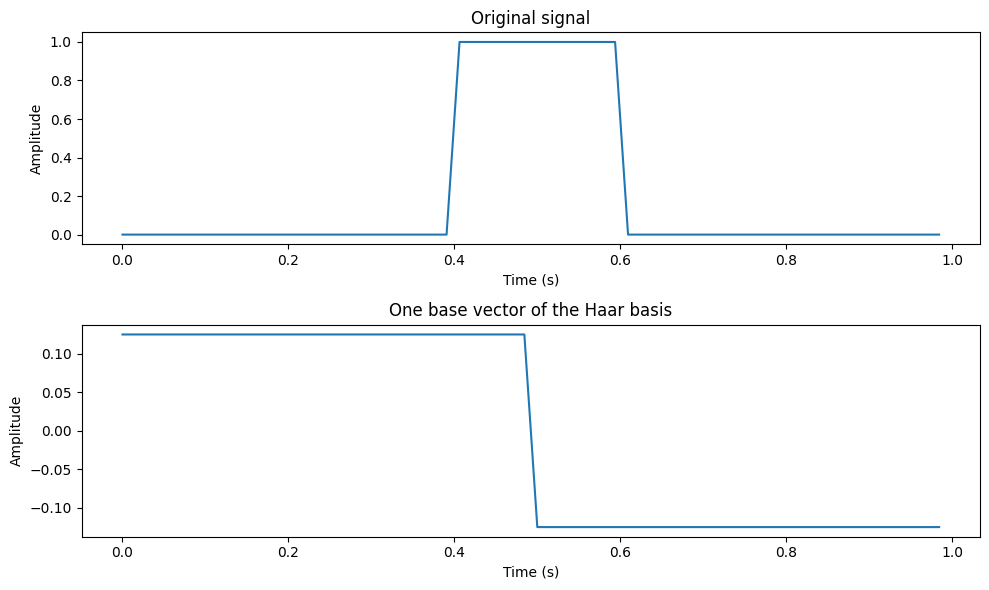

In [19]:
# Define a signal to be compressed
fs = 64 # Sampling frequency
t = np.arange(0, 1, 1/fs) # Time vector
#x = np.sin(2*np.pi*5*t) # Sine wave with frequency 5 Hz

## Box signal
box_start = 2/5
box_end = 3/5
x = np.zeros_like(t)
x[(t >= box_start) & (t <= box_end)] = 1


# Compute the Haar matrix of order N
N = len(x)
H = haarmatrix(N)

# Check if the matrix is orthogonal
check_orthogonality(H, N)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t, H[1])
plt.title('One base vector of the Haar basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

We can see that the signal is the box function. You can play with the second plot ` plt.plot(t, H[i])` where `i` is the basis vector

Next we actually change the basis. You should implement the change of basis yourself.<br>
*Hint*: Recall what you saw in section 2.2 and what is in essence the Haar matrix,

In [20]:
# Compute the Haar coefficients of the signal, or in other words the representation of your signal in the Haar basis.
### Your code HERE ### 
c = ...

As explained earlier, one key feature of Haar basis is that it encodes information in a *hierarchical* way. So it would be natural to use it either for compression or for transmitting a signal with a high error probability. We first consider compression. The way to do so is by sorting coefficients in decreasing order of magnitude, and keeping only these coefficients as our signal. Putting everything else to 0 gives the last plot bellow. We can see that almost all information is encoded in the first half of the signal

In [21]:
# Sort the Haar coefficients in decreasing order of magnitude and keep only the top k coefficients
k = int(N/2)

idx = np.argsort(np.abs(c))[::-1][:k]
c_compress = np.zeros_like(c)
c_compress[idx] = c[idx]

# Compute the inverse Haar transform of the top k coefficients to obtain the compressed signal
### Your code HERE ### 
x_compress = ...

TypeError: bad operand type for abs(): 'ellipsis'

ValueError: x and y must have same first dimension, but have shapes (64,) and (1,)

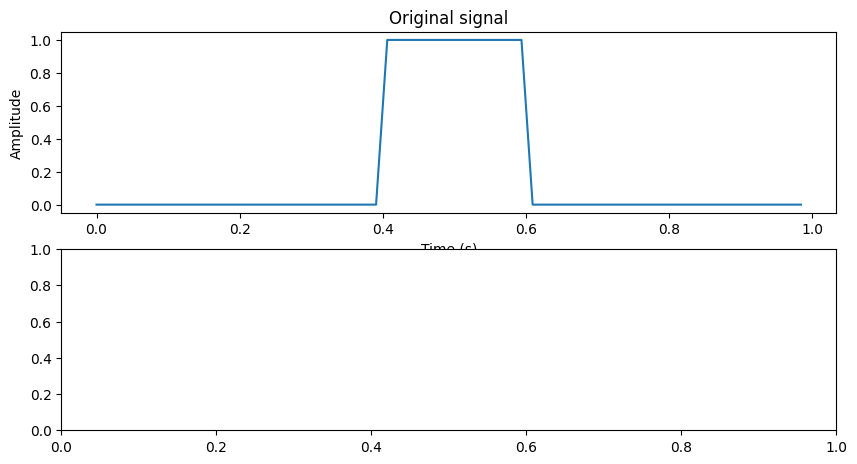

In [22]:
# Plot the original signal and the compressed signal
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 2)
plt.plot(t, c)
plt.title('Signal in Haar Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 3)
plt.plot(t, c_compress)
plt.title('Compressed signal in Haar Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Now imagine that we want to decompress the signal. We take the compressed signal and apply the formula $\hat s = H^{T}\hat c $. This gives the "decompressed" signal $\hat s$ which is almost correctly reconstructed.

In [ ]:
# Reconstruct the original signal from the compressed signal and the Haar basis
c_reconstruct = np.zeros_like(c)
c_reconstruct[idx] = c_compress[idx]


### Your code HERE ### 
x_decompressed = ...

# Plot the original signal, the compressed signal, and the reconstructed signal
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 2)
plt.plot(t, c_compress)
plt.title('Compressed signal in Haar Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 3)
plt.plot(t, x_decompressed)
plt.title('Reconstructed signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

You can play witht the value of `k` to see at which point compression factor starts to affect decompression! 

## The impact of transmission errors on Haar decomposition

Now we will see the visual effect if half the signal is lost. First the second half and then the first half. This will have an impact as you might recall that the Haar basis compresses information in a *hierarchical* manner!

In [23]:
# oops, we lose second half the data
c_reconstruct_sec = np.copy(c_reconstruct)
c_reconstruct_first = np.copy(c_reconstruct)
c_reconstruct_sec[int(len(x)/2):] = 0
c_reconstruct_first[:int(len(x)/2)]=0
x_reconstruct_sec = np.dot(np.transpose(H), c_reconstruct_sec)
x_reconstruct_first = np.dot(np.transpose(H), c_reconstruct_first)

# Plot the original signal, the compressed signal, and the reconstructed signal
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.title('Original signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(t, c_compress)
plt.title('Compressed signal in Haar Basis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(t, x_reconstruct_sec)
plt.title('Reconstructed signal with second half of input being lost')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(t, x_reconstruct_first)
plt.title('Reconstructed signal with first half of input being lost')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

NameError: name 'c_reconstruct' is not defined

This is quite remarkable! Even with **half** of the signal being lost, we can reconstruct a partially good signal (we can easily see that the original signal is almost completely recovered!). Note that it works only if the second half of the signal is lost. If the first half is lost instead, the reconstruction does not work at all. That is one of the reason why Haar basis has been left for another basis that you will see next week (Spoiler alert, it's gonna be mind blowing).  

Try to redo these examples by uncommentingn the sinusoid function (and commenting the box function). This gives a nice graphical intuition on how hierarchical the information is encoded!

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


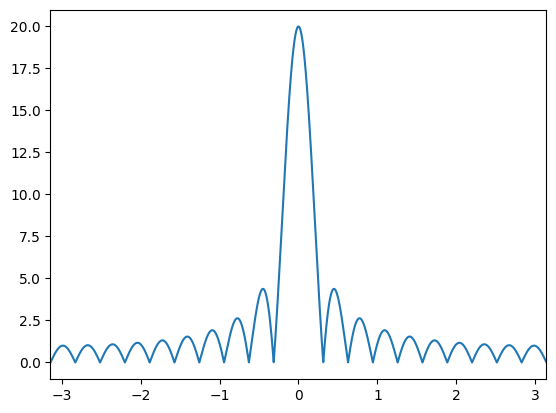

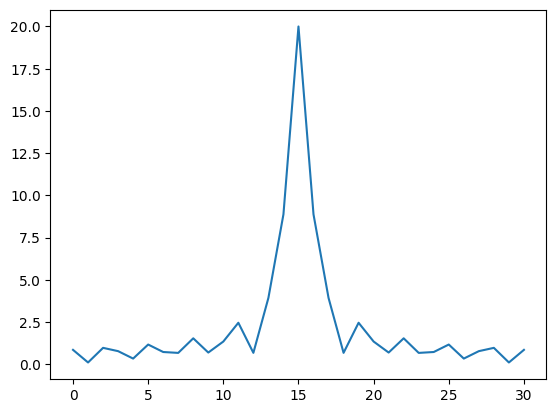

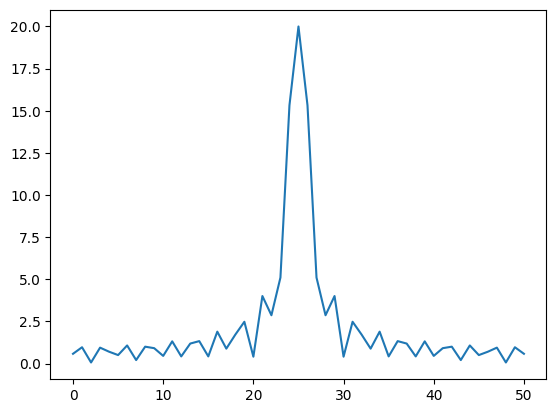

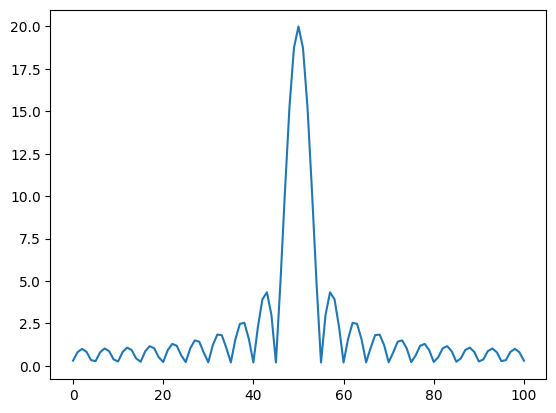

In [31]:
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# (b)

M = 20
w = np.linspace(-np.pi, np.pi, 10000)
X = np.abs(np.sin( (M/2) * w) / np.sin(w/2) )
plt.plot(w, X);
plt.xlim([-np.pi, np.pi])
plt.show();

# (c)

for n in [31, 51, 101]:
    x = np.zeros(n)
    x[0:M] = 1
    X_a = np.fft.fft(x)
    X_a_shift = np.fft.fftshift(X_a) #shift to the center of the spectrum
    plt.plot(np.abs(X_a_shift)) #plot the absolute value of the DFT
    plt.show()

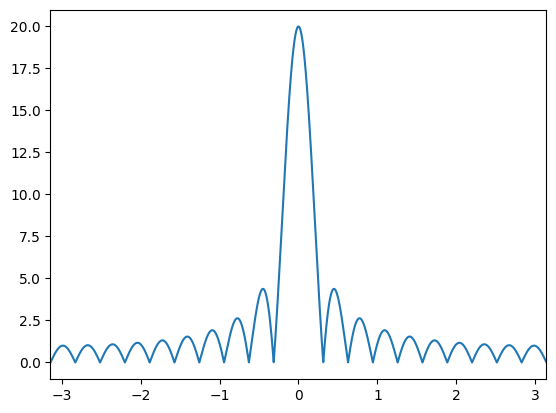

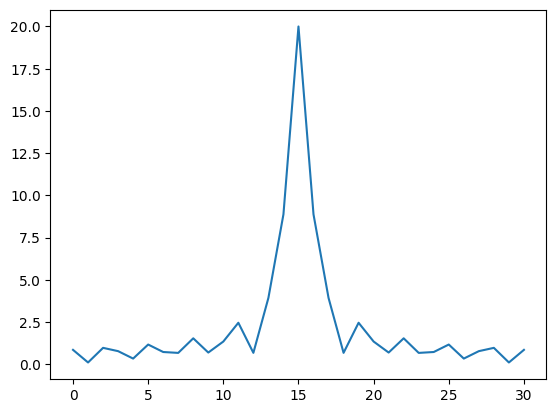

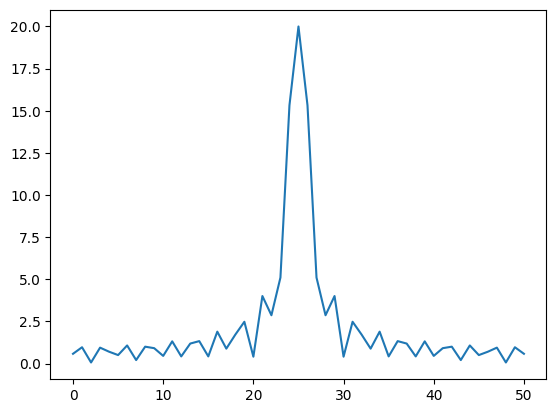

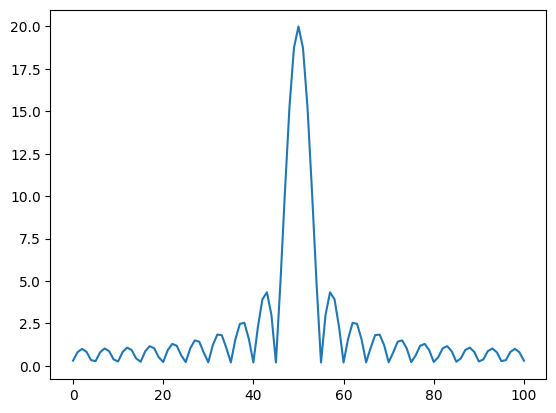

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# (b)

M = 20
w = np.linspace(-np.pi, np.pi, 10000)
X = np.abs(np.sin((M/2) * w) / np.sin(w/2))
plt.plot(w, X)
plt.xlim([-np.pi, np.pi])
plt.show()

# (c)

for n in [31, 51, 101]:
    x = np.zeros(n)
    x[0:M] = 1
    X_a = np.fft.fft(x)
    X_a_shift = np.fft.fftshift(X_a)  # shift to the center of the spectrum
    plt.plot(np.abs(X_a_shift))  # plot the absolute value of the DFT
    plt.show()